15.03.25, © Klymenko Vladyslav KI-21-1

## Лабораторна робота 2. Побудова лінійного бінарного класифікатора на основі оптимізації функціонала якості

### Що ви будете вміти?
Познайомитеся з деякими можливостями бібліотеки NumPy.
Реалізувати простий лінійний класифікатор Розенблата мовою Python

### Завдання для самостійної роботи
1. Використовувати деякі можливості бібліотеки NumPy
2. Реалізувати простий лінійний класифікатор на основі оптимізації функціонала якості засобами мови Python

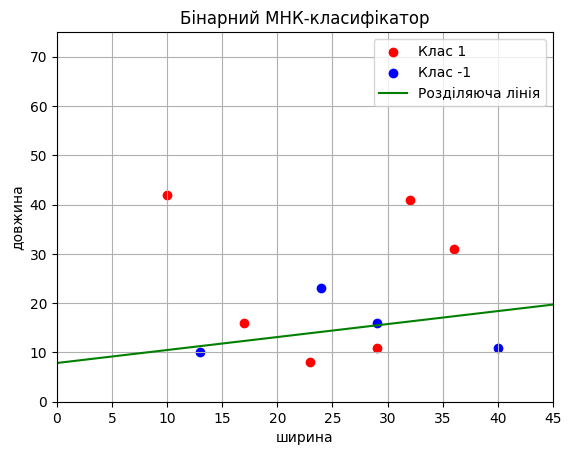

Вагові коефіцієнти: [-0.00825462  0.03134916 -0.24635534]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Імпорт даних з файлу
data = np.loadtxt('data.txt')  # Зчитуємо файл, припускаючи формат: ознака1 ознака2 мітка
x_train = data[:, :2]          
y_train = data[:, 2]    

# Додаємо зміщення (bias)
x_train = np.hstack((x_train, np.ones((x_train.shape[0], 1))))

# Обчислення вагових коефіцієнтів за методом МНК
pt = np.sum(x_train * y_train[:, np.newaxis], axis=0)  # Підсумок x * y
xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)  # Матриця x * x^T
w = np.dot(pt, np.linalg.inv(xxt))  # Визначення вагових коефіцієнтів

# Побудова розділяючої лінії
line_x = np.linspace(0, 45, 100)  # Діапазон значень x
line_y = -w[0] / w[1] * line_x - w[2] / w[1]  # Обчислення y

# Розбиття точок за класами
x_0 = x_train[y_train == 1]  # Клас 1 (червоні точки)
x_1 = x_train[y_train == -1]  # Клас -1 (сині точки)

# Побудова графіку
plt.scatter(x_0[:, 0], x_0[:, 1], color='red', label='Клас 1')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue', label='Клас -1')
plt.plot(line_x, line_y, color='green', label='Розділяюча лінія')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.xlabel("ширина")
plt.ylabel("довжина")
plt.legend()
plt.grid(True)
plt.title("Бінарний МНК-класифікатор")
plt.show()

# Вивід коефіцієнтів
print("Вагові коефіцієнти:", w)

3. Проаналізувати отримані результати і порівняти їх з результатами, отриманими у лаб роб. 1.

Результат з використанням МНК-класифікатора виявився більш точним, ніж алгоритм, який використовувався в першій лабораторній роботі.

Лабораторна робота 1

- Алгоритм корекції ваг зупиняється, коли всі точки правильно класифіковані (якщо це можливо). Якщо дані лінійно розділені, він дасть ідеальний результат на навчальних даних.
- Але якщо дані не лінійно розділені (як у нашому випадку), перцептрон може "застрягти" і дати нестабільну межу, яка залежить від порядку точок.

Лабораторна робота 2

МНК не гарантує ідеальної класифікації, навіть якщо дані лінійно розділені, бо він мінімізує середню помилку, а не кількість неправильно класифікованих точок. Проте у випадку з нелінійним розподілом значень, як зараз він показує меншу похибку, хоча і є помилки в класифікації леяких точок.


4. Дати відповіді на контрольні запитання.

#### Що таке відступ (margin) і яка його роль в побудові моделі класифікації?

Відступ (margin) — це величина, що визначає, наскільки правильно і впевнено класифікатор розділяє дані. Визначається як:
$ M_i = y_i (w^T x_i + b) $

- $ y_i $ — правильна мітка класу (-1 або 1),  
- $ x_i $ — вектор ознак,  
- $ w $ — ваговий вектор,  
- $ b $ — зміщення (bias).

- Відступ допомагає оцінити, наскільки добре модель розділяє класи. У методах типу SVM (машина опорних векторів) мета — максимізувати відступ між класами, щоб межа була якомога "ширшою" і стійкою до шуму. Якщо відступ більше 0, то точка правильно класифікована. Якщо менше 0, то неправильно.
- У МНК-класифікаторі (як у лабораторній роботі 2) відступ прямо не максимізується, але він впливає на функціонал якості: точки з малим відступом або з неправильним знаком збільшують квадратичну помилку, і модель підлаштовує $ w $, щоб зменшити цю помилку.

#### Яка роль функції втрат і чому не можна знайти коефіцієнти лінійного класифікатора шляхом безпосереднього розв’язаня задачі оптимізації через знаходження похідної?

Функція втрат — це математична функція, яка показує, наскільки погано класифікатор передбачає правильні мітки для даних. Вона вимірює різницю між тим, що передбачає модель і справжньою міткою (-1 або 1). У лабораторній роботі використовується квадратична функція втрат. Це означає, що для кожної точки ми беремо різницю між передбаченням і міткою, зводимо її в квадрат (щоб позбутися знака і покарати більші помилки сильніше), а потім складаємо всі такі помилки.

Мета — знайти такі ваги $ w $, щоб функція втрат була якомога меншою. Це означає, що модель буде якомога краще передбачати мітки. 

У МНК-класифікаторі (як у лабораторній роботі 2) квадратична функція втрат змушує модель враховувати відстань кожної точки до межі. Якщо точка далеко від правильного боку, штраф (квадрат помилки) буде великим, і модель підлаштує $ w $, щоб зменшити цей штраф.

##### Чому не можна знайти коефіцієнти лінійного класифікатора шляхом безпосереднього розв’язання задачі оптимізації через знаходження похідної?

Нелінійність функції втрат
Наприклад, у логістичній регресії функція втрат базується на логарифмічній залежності. Вона враховує, наскільки передбачення моделі відрізняється від правильної мітки, але робить це нелінійно — тобто залежність між помилкою і штрафом не є прямою лінією. Через цю нелінійність, якщо ми спробуємо знайти найкращі ваги, взявши похідну (тобто визначивши, де "нахил" функції дорівнює нулю), ми не зможемо отримати просте рішення. Рівняння, яке виходить, виявляється дуже складним, і ми не можемо просто "виразити" ваги у вигляді готової формули.

Недиференційовність
У методі SVM (машина опорних векторів) використовується інший тип функції втрат, який називається шарнірною втратою. Ця функція працює так: якщо точка правильно класифікована і достатньо далеко від межі, штраф дорівнює нулю; якщо ж точка близько до межі або по неправильний бік, штраф зростає. Проблема в тому, що ця функція має "злам" — точку, де її поведінка різко змінюється. Через це в класичному сенсі похідну в цій точці визначити неможливо, а значить, ми не можемо просто прирівняти похідну до нуля, щоб знайти ваги.


#### Вивести математичний вираз для оцінки вектора $ w $

$   {\omega} = (X^T X)^{-1} X^T y. $





5. Відправити результати роботи у файлі lab_2_Klymenko.ipynb до віддаленого репозиторію на GіtHub.
